# Data Loading and Ploting

In [1]:
DataSet_path = "/kaggle/input/city-life-dataset/P05. Citylife"

## Loading Rush Hours

In [2]:
import os
import pandas as pd
import numpy as np

rush_hours_df = pd.read_csv(os.path.join(DataSet_path, "rush_hours_empty.csv"))
rush_hours_df

,name,longitude,latitude,num_of_rides,Trip End Timestamp
0,someplace,-87.354944,41.984939,17,21.04.2018 16:00:00


## Loading Taxi Locations

In [3]:
taxi_locations_df = pd.read_csv(os.path.join(DataSet_path, "taxi_locations.csv"))
taxi_locations_df

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Timestamp,Trip End Timestamp,Taxi ID,Fare
0,304a88bf5d8a7d60c1dbfd88661caa15ee4cb0ea,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.778877,-87.594925,POINT (-87.5949254391 41.7788768603),10/12/2014 08:30:00 PM,10/12/2014 08:45:00 PM,ada14d22a0c2f8c7fe79140611a8e76602acdd8b448282...,19.25
1,b1a8b95ea294663cc3d3cb38a538f464418288c4,41.947792,-87.683835,POINT (-87.6838349425 41.9477915865),41.874005,-87.663518,POINT (-87.6635175498 41.874005383),10/12/2014 08:30:00 PM,10/12/2014 08:45:00 PM,92ab37c26efa3b2659e525a0a2ae31e69c84ffd7bcfef2...,13.05
2,752c8ac4bdf62db4c3d4e810cab915a0ec0ceddc,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),09/09/2014 06:00:00 PM,09/09/2014 06:00:00 PM,d06d9962fe86645dd59a7dce41cf27734b23dc62974283...,4.85
3,6808fa8dc0d009190da2e2416203a7ba012f45a9,41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),10/12/2014 06:30:00 AM,10/12/2014 06:30:00 AM,26d0351db732d6b194d3ae9f29b4a3c53070fdd14aa3c9...,3.25
4,01428cb986d678ea0a8d39b6b35d05d06baa631a,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),09/07/2014 05:45:00 PM,09/07/2014 06:45:00 PM,25b37d641316c0ca5cb44edf8eaf9f012e2495549f60b7...,38.25
...,...,...,...,...,...,...,...,...,...,...,...
2506289,21bc604a66e2c479f767bdfd6ddfec6a7b57065b,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),06/16/2019 10:30:00 PM,06/16/2019 11:00:00 PM,f6591bb5699bde5f19f3074a76774808dd0e5c941ee0ed...,44.25
2506290,21beff87d222ce3c0e1c62f9278c1ed8a455550a,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),06/03/2019 11:00:00 AM,06/03/2019 11:15:00 AM,6161b78168fb8a51b06c3994f62522e1d21390a969e3b1...,4.25
2506291,21baf5e9060fb66f7b5e11444d32d07275a3a2ee,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),06/15/2019 01:45:00 PM,06/15/2019 01:45:00 PM,025c4a64d4348a8184bbf4109fea03a717b87f48029d95...,10.75
2506292,21bfa342fb04bdf42585c216c9da58cc5a6975f2,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),06/05/2019 05:15:00 PM,06/05/2019 05:15:00 PM,e39f9fb04c45fac83b35fbc9c36b68ba97cdf877dd76fd...,5.75


In [4]:
taxi_locations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506294 entries, 0 to 2506293
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip ID                     object 
 1   Pickup Centroid Latitude    float64
 2   Pickup Centroid Longitude   float64
 3   Pickup Centroid Location    object 
 4   Dropoff Centroid Latitude   float64
 5   Dropoff Centroid Longitude  float64
 6   Dropoff Centroid  Location  object 
 7   Trip Start Timestamp        object 
 8   Trip End Timestamp          object 
 9   Taxi ID                     object 
 10  Fare                        float64
dtypes: float64(5), object(6)
memory usage: 210.3+ MB


## Editing, Extracting DataTime Data

In [5]:
# Extracting hour, day of week, and month for temporal analysis
taxi_locations_df['Trip Start Timestamp'] = pd.to_datetime(taxi_locations_df['Trip Start Timestamp'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
taxi_locations_df['Trip End Timestamp'] = pd.to_datetime(taxi_locations_df['Trip End Timestamp'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
taxi_locations_df['Trip Start Hour'] = taxi_locations_df['Trip Start Timestamp'].dt.hour
taxi_locations_df['Trip Start Day'] = taxi_locations_df['Trip Start Timestamp'].dt.day_name()
taxi_locations_df['Trip Start Month'] = taxi_locations_df['Trip Start Timestamp'].dt.month_name()

# Count of trips by hour
hourly_trip_counts = taxi_locations_df['Trip Start Hour'].value_counts().sort_index()

# Count of trips by day of the week
daily_trip_counts = taxi_locations_df['Trip Start Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Count of trips by month
monthly_trip_counts = taxi_locations_df['Trip Start Month'].value_counts().sort_index()

In [6]:
taxi_locations_df

,Trip ID,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location,Trip Start Timestamp,Trip End Timestamp,Taxi ID,Fare,Trip Start Hour,Trip Start Day,Trip Start Month
0,304a88bf5d8a7d60c1dbfd88661caa15ee4cb0ea,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.778877,-87.594925,POINT (-87.5949254391 41.7788768603),2014-10-12 20:30:00,2014-10-12 20:45:00,ada14d22a0c2f8c7fe79140611a8e76602acdd8b448282...,19.25,20,Sunday,October
1,b1a8b95ea294663cc3d3cb38a538f464418288c4,41.947792,-87.683835,POINT (-87.6838349425 41.9477915865),41.874005,-87.663518,POINT (-87.6635175498 41.874005383),2014-10-12 20:30:00,2014-10-12 20:45:00,92ab37c26efa3b2659e525a0a2ae31e69c84ffd7bcfef2...,13.05,20,Sunday,October
2,752c8ac4bdf62db4c3d4e810cab915a0ec0ceddc,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027),2014-09-09 18:00:00,2014-09-09 18:00:00,d06d9962fe86645dd59a7dce41cf27734b23dc62974283...,4.85,18,Tuesday,September
3,6808fa8dc0d009190da2e2416203a7ba012f45a9,41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),41.901567,-87.638404,POINT (-87.6384040116 41.9015669095),2014-10-12 06:30:00,2014-10-12 06:30:00,26d0351db732d6b194d3ae9f29b4a3c53070fdd14aa3c9...,3.25,6,Sunday,October
4,01428cb986d678ea0a8d39b6b35d05d06baa631a,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),2014-09-07 17:45:00,2014-09-07 18:45:00,25b37d641316c0ca5cb44edf8eaf9f012e2495549f60b7...,38.25,17,Sunday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506289,21bc604a66e2c479f767bdfd6ddfec6a7b57065b,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-06-16 22:30:00,2019-06-16 23:00:00,f6591bb5699bde5f19f3074a76774808dd0e5c941ee0ed...,44.25,22,Sunday,June
2506290,21beff87d222ce3c0e1c62f9278c1ed8a455550a,41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843),2019-06-03 11:00:00,2019-06-03 11:15:00,6161b78168fb8a51b06c3994f62522e1d21390a969e3b1...,4.25,11,Monday,June
2506291,21baf5e9060fb66f7b5e11444d32d07275a3a2ee,41.879255,-87.642649,POINT (-87.642648998 41.8792550844),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707),2019-06-15 13:45:00,2019-06-15 13:45:00,025c4a64d4348a8184bbf4109fea03a717b87f48029d95...,10.75,13,Saturday,June
2506292,21bfa342fb04bdf42585c216c9da58cc5a6975f2,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),2019-06-05 17:15:00,2019-06-05 17:15:00,e39f9fb04c45fac83b35fbc9c36b68ba97cdf877dd76fd...,5.75,17,Wednesday,June


## Ploting Trips Number By DataTime Type

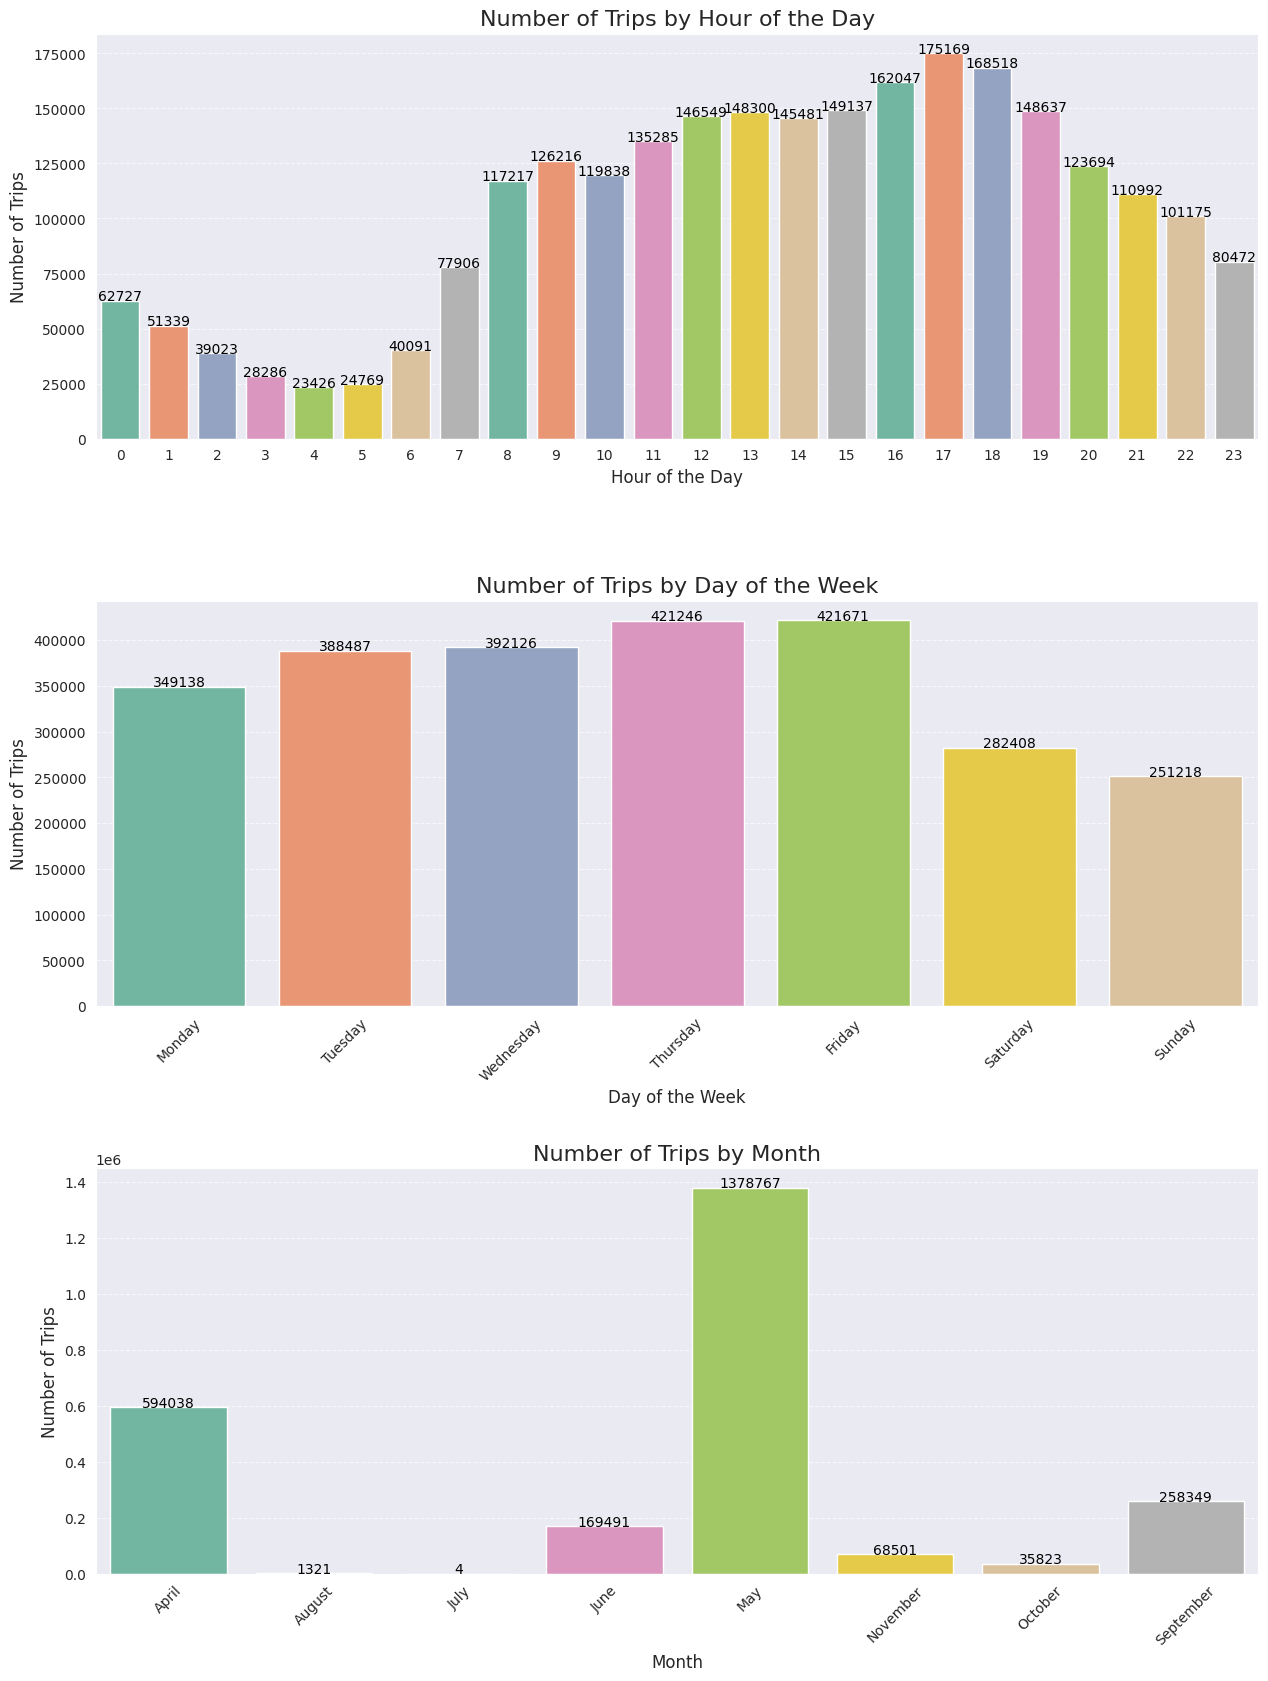

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")
colors = sns.color_palette("Set2", 8)

# Create a single figure for all three plots
fig, axes = plt.subplots(3, 1, figsize=(15, 20), gridspec_kw={'hspace': 0.4})

# Plotting Number of Trips by Hour
sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, ax=axes[0], palette=colors)
axes[0].set_title('Number of Trips by Hour of the Day', fontsize=16)
axes[0].set_xlabel('Hour of the Day', fontsize=12)
axes[0].set_ylabel('Number of Trips', fontsize=12)
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the peaks
for i, value in enumerate(hourly_trip_counts.values):
    axes[0].text(i, value + 5, f'{value}', ha='center', fontsize=10, color='black')

# Plotting Number of Trips by Day of the Week
sns.barplot(x=daily_trip_counts.index, y=daily_trip_counts.values, ax=axes[1], palette=colors)
axes[1].set_title('Number of Trips by Day of the Week', fontsize=16)
axes[1].set_xlabel('Day of the Week', fontsize=12)
axes[1].set_ylabel('Number of Trips', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the peaks
for i, value in enumerate(daily_trip_counts.values):
    axes[1].text(i, value + 5, f'{value}', ha='center', fontsize=10, color='black')

# Plotting Number of Trips by Month
sns.barplot(x=monthly_trip_counts.index, y=monthly_trip_counts.values, ax=axes[2], palette=colors)
axes[2].set_title('Number of Trips by Month', fontsize=16)
axes[2].set_xlabel('Month', fontsize=12)
axes[2].set_ylabel('Number of Trips', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the peaks
for i, value in enumerate(monthly_trip_counts.values):
    axes[2].text(i, value + 5, f'{value}', ha='center', fontsize=10, color='black')

# Display the plots
plt.show()

# Most popular areas

# Loading PickPoints and DropOffs

In [8]:
pickpoints_df = taxi_locations_df[["Pickup Centroid Latitude", "Pickup Centroid Longitude"]].dropna()
drop_offs_df = taxi_locations_df[["Dropoff Centroid Latitude", "Dropoff Centroid Longitude"]].dropna()
pickpoints_df.reset_index(inplace=True)
drop_offs_df.reset_index(inplace=True)

## Clustering Analysis Of Pick Point And Drop Of

- Conduct clustering analysis of pick point and drop off locations based on their
coordinates. Clusters might be different for each of the categories (pickpoints and
drop-offs).

```
FAISS KMeans Choice Argument:
Because it’s fast, GPU-capable, and ideal for huge datasets.
```

In [9]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 57.9 MB/s eta 0:00:00:00:0100:01


In [69]:
import faiss
from sklearn.preprocessing import StandardScaler

use_gpu = faiss.get_num_gpus() > 0
# Function to perform clustering with Faiss
def faiss_kmeans(data, n_clusters):
    # Normalize the data
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data).astype(np.float32)

    kmeans = faiss.Kmeans(d=data_normalized.shape[1], k=n_clusters, niter=300, nredo=10, gpu=use_gpu)
    kmeans.train(data_normalized)

    _, labels = kmeans.index.search(data_normalized, 1)
    return labels.ravel(), kmeans.centroids

# Perform clustering
optimal_k_pickup = 5
pickup_labels, pickup_centroids = faiss_kmeans(pickpoints_df.values, optimal_k_pickup)

optimal_k_dropoff = 9
dropoff_labels, dropoff_centroids = faiss_kmeans(drop_offs_df.values, optimal_k_dropoff)

# Ensure labels are aligned with coordinates
pickup_labels = pd.Series(pickup_labels, index=pickpoints_df.index)
dropoff_labels = pd.Series(dropoff_labels, index=drop_offs_df.index)

In [70]:
import geopandas as gpd
from shapely.geometry import MultiPoint

# Create GeoDataFrames
pickup_gdf = gpd.GeoDataFrame(
    pickpoints_df,
    geometry=gpd.points_from_xy(
        pickpoints_df['Pickup Centroid Longitude'],
        pickpoints_df['Pickup Centroid Latitude']
    )
)
dropoff_gdf = gpd.GeoDataFrame(
    drop_offs_df,
    geometry=gpd.points_from_xy(
        drop_offs_df['Dropoff Centroid Longitude'],
        drop_offs_df['Dropoff Centroid Latitude']
    )
)

pickup_gdf['cluster'] = pickup_labels.values
dropoff_gdf['cluster'] = dropoff_labels.values

In [71]:
pickup_gdf

,index,Pickup Centroid Latitude,Pickup Centroid Longitude,geometry,cluster
0,0,41.878866,-87.625192,POINT (-87.62519 41.87887),1
1,1,41.947792,-87.683835,POINT (-87.68383 41.94779),2
2,2,42.001571,-87.695013,POINT (-87.69501 42.00157),2
3,3,41.901567,-87.638404,POINT (-87.63840 41.90157),1
4,4,41.892042,-87.631864,POINT (-87.63186 41.89204),1
...,...,...,...,...,...
2506289,2506289,41.979071,-87.903040,POINT (-87.90304 41.97907),4
2506290,2506290,41.922686,-87.649489,POINT (-87.64949 41.92269),0
2506291,2506291,41.879255,-87.642649,POINT (-87.64265 41.87926),0
2506292,2506292,41.884987,-87.620993,POINT (-87.62099 41.88499),0


In [81]:
# Proceed with compute_convex_hulls function
def compute_convex_hulls(gdf, cluster_label):
    cluster_hulls = []
    for cluster_id in gdf[cluster_label].unique():
        points = gdf[gdf[cluster_label] == cluster_id]['geometry']
        if len(points) > 2:  # Convex hull requires at least 3 points
            hull = MultiPoint(list(points)).convex_hull
            cluster_hulls.append({'cluster': cluster_id, 'geometry': hull})
    return gpd.GeoDataFrame(cluster_hulls)

pickup_hulls = compute_convex_hulls(pickup_gdf, 'cluster')

dropoff_hulls = compute_convex_hulls(dropoff_gdf, 'cluster')

In [82]:
# Calculate densities
pickup_cluster_sizes = pickup_gdf.groupby('cluster').size().reset_index(name='counts')
pickup_hulls = pickup_hulls.merge(pickup_cluster_sizes, on='cluster')

dropoff_cluster_sizes = dropoff_gdf.groupby('cluster').size().reset_index(name='counts')
dropoff_hulls = dropoff_hulls.merge(dropoff_cluster_sizes, on='cluster')

In [ ]:
for i in range(len(pickup_hulls)):
    for j in range(len(pickup_hulls)):
        if i >= j:
            continue
        poly1 = pickup_hulls.loc[i, "geometry"]
        poly2 = pickup_hulls.loc[j, "geometry"]
        
        if poly1.intersects(poly2):
            intersection = poly1.intersection(poly1)
            print(intersection)
            print(f"Polygon {i} intersects with Polygon {j}")
        if poly1.contains(poly2):
            print(f"Polygon {i} contains Polygon {j}")
        if poly2.contains(poly1):
            print(f"Polygon {j} contains Polygon {i}")

In [102]:
for key in range(5):
    print(pickup_hulls.geometry[key])

def check_points_under_or_over(hulls):
    results = []
    for i, hull in hulls.iterrows():
        hull_geom = hull['geometry']
        for j, point in hulls.iterrows():
            if i == j:  # Skip checking the same polygon
                continue
            point_geom = point['geometry']
            if hull_geom.contains(point_geom):  # Check if the polygon contains the point
                results.append((i, j, "contains"))
            elif hull_geom.intersects(point_geom):  # Check if the polygon intersects the point
                results.append((i, j, "intersects"))
    return results

# Example usage
# Assuming `hulls` is a GeoDataFrame of polygons and `points` is a GeoDataFrame of points
results = check_points_under_or_over(pickup_hulls)
print(results)

POLYGON ((-87.582365702 41.797153425, -87.659166599 41.80901825, -87.69886079700001 41.817366208, -87.75604671100002 41.890608853, -87.75097986 41.919564556, -87.699968591 41.928431564, -87.651562592 41.936310131, -87.63857492 41.938391258, -87.634647877 41.934650448, -87.612945414 41.891971508000005, -87.582365702 41.797153425))
POLYGON ((-87.760812989 41.905820977, -87.7753675 41.91292537, -87.797600684 41.925588088000005, -87.80602000200001 41.94651142, -87.797398984 41.979204551, -87.75759748600002 41.994498038, -87.69966304200001 42.01569675, -87.680162272 42.016010564, -87.67333377799999 42.016046492, -87.666536278 42.015934376, -87.65912242700001 42.004764559, -87.655814902 41.995512991, -87.634647877 41.934650448, -87.63415609299999 41.922082541, -87.654007029 41.914747305, -87.683642922 41.911972301, -87.751474332 41.906186104, -87.760812989 41.905820977))
POLYGON ((-87.60284764 41.660136051, -87.71319249700001 41.694878966, -87.768510849 41.779582888, -87.76961545299999 41.79

In [104]:
from shapely.geometry import Point

def remove_points_from_hulls(hulls, results):
    for hull_idx, point_idx, relation in results:
        # Get the polygon and the point
        hull_geom = hulls.loc[hull_idx, 'geometry']
        point_geom = hulls.loc[point_idx, 'geometry']
        
        # Remove the point from the polygon using difference
        if isinstance(point_geom, Point):  # Ensure it's a point
            hulls.loc[hull_idx, 'geometry'] = hull_geom.difference(point_geom)
    return hulls

# results = check_points_under_or_over(pickup_hulls)
cleaned_hulls = remove_points_from_hulls(pickup_hulls, results)

In [29]:
cleaned_polygons = []
for i, poly in enumerate(pickup_hulls.geometry):
    cleaned = poly
    for j, other in enumerate(pickup_hulls.geometry):
        if i != j:
            cleaned = cleaned.difference(other)
    cleaned_polygons.append(cleaned)

pickup_hulls['cleaned_geometry'] = cleaned_polygons

In [89]:
print(type(pickup_hulls))
gdf = gpd.GeoDataFrame(geometry=polygons)

<class 'geopandas.geodataframe.GeoDataFrame'>


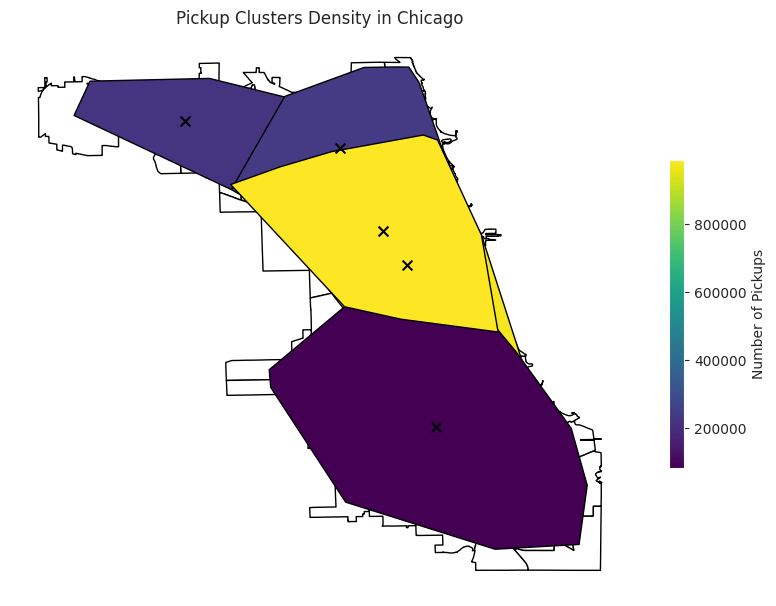

In [105]:
# Plotting with density-based color scales
from shapely.ops import unary_union


def adjust_hulls(hulls):
    adjusted_hulls = []
    for i, row in hulls.iterrows():
        current_geom = row['geometry']
        for other_geom in adjusted_hulls:
            # Remove overlapping areas with previously adjusted polygons
            current_geom = current_geom.difference(other_geom)
        adjusted_hulls.append(current_geom)
    hulls['geometry'] = adjusted_hulls
    return hulls

chicago_map = gpd.read_file(f'{DataSet_path}/chicago_map.shx')
for data_type, hulls, title in [('Pickup', cleaned_hulls, 'Pickup Clusters Density in Chicago')]:#, ('Drop-off', dropoff_hulls, 'Drop-off Clusters Density in Chicago')]:
    fig, ax = plt.subplots(figsize=(10, 8))
    chicago_map.plot(ax=ax, color='white', edgecolor='black')
    hulls.plot(ax=ax, column='counts', cmap='viridis', edgecolor='black', legend=True, legend_kwds={'label': f"Number of {data_type}s", 'shrink': 0.5})
    # Compute centroids
    centroids = hulls.copy()
    centroids['geometry'] = hulls.centroid
    centroids.plot(ax=ax, color='black', markersize=50, marker='x')
    ax.set_title(title)
    ax.axis('off')
    plt.show()